# Sprint-3：線形回帰のスクラッチ
___

## import部

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

## クラス：ScratchLinearRegression

In [76]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=5000, lr=0.01, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        self.theta = np.array(0)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # Set theta with random value
        onesX_train = np.array([np.concatenate(([1], v)) for v in X])
        
        if X_val is not None and y_val is not None:
            onesX_test = np.array([np.concatenate(([1], v)) for v in X_val])
        
        # Set initial value of theta
        self.theta = np.random.rand(len(onesX_train[0]))
        
        count = 0
        while count < self.iter:
            self._gradient_descent(onesX_train, y)
            self.loss[count] = (0.5*MSE(self._linear_hypothesis(onesX_train), y))
                
            if len(X_val) != 0 and len(y_val) != 0:
                self.val_loss[count] = (0.5*MSE(self._linear_hypothesis(onesX_test), y_val))

            count += 1

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("{}回目の損失：{}".format(count, self.val_loss[count-1]))

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        onesX = np.array([np.concatenate(([1], v)) for v in X])
        
        return self._linear_hypothesis(onesX)
    
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """

        h_theta_x = np.dot(X, self.theta)

        return h_theta_x
    
    def _gradient_descent(self, X, error):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        error : 次の形のndarray, shape (n_errors, 1)
          誤差

        """

        # Update theta
        self.theta = self.theta - (np.dot(self._linear_hypothesis(X) - error, X))/len(X)*self.lr
        
    def plot_loss(self):
        """
        損失関数の値の変化（学習曲線）をプロット
        """
        x1 = np.arange(len(self.loss))
        x2 = np.arange(len(self.val_loss))

        fig = plt.figure(figsize=(12,8), linewidth=8.0)
        plt.plot(x1, self.loss)
        plt.plot(x2, self.val_loss)
        plt.show()
    
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    
    mse = np.sum((y - y_pred)**2) / len(y_pred)
    
    return mse

## read csv

In [10]:
train_dataset = pd.read_csv("../Sprint-3/train.csv")
test_dataset = pd.read_csv("../Sprint-3/test.csv")

## データの前処理

In [11]:
for col in train_dataset.columns:
    values, uniques = pd.factorize(train_dataset[col])
    train_dataset[col] = values

## 学習用にデータを整形

In [12]:
train_X = train_dataset.drop(["SalePrice"], axis=1)
train_Y = train_dataset["SalePrice"]

## 学習用とテスト用のデータに分割

In [68]:
x_train, x_test, y_train, y_test = train_test_split(np.array(train_X), \
                                                    np.array(train_Y), \
                                                    train_size=0.70, test_size=0.30)

## データの標準化

In [71]:
sc = StandardScaler()
std_train_X = sc.fit_transform(train_X.astype(float))
std_test_X = sc.fit_transform(x_test.astype(float))

## スクラッチ線形回帰の学習を実行

In [77]:
slr = ScratchLinearRegression(num_iter=5000, lr=0.0000008)
slr.fit(x_train, y_train, x_test, y_test)

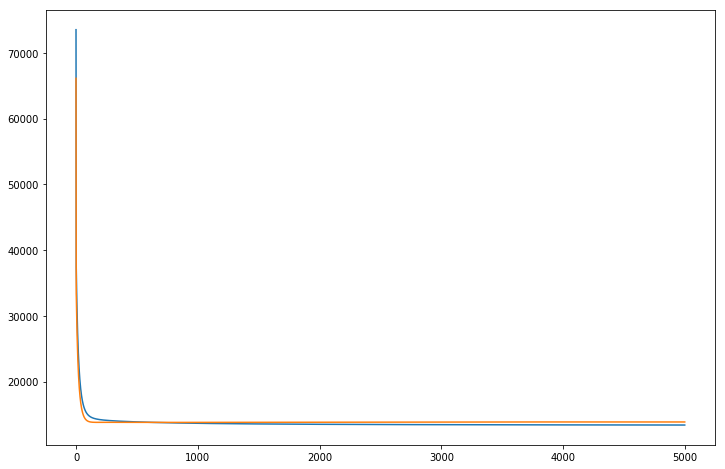

In [78]:
slr.plot_loss()

In [74]:
pred = slr.predict(x_test)

In [75]:
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train, y_train)
pred1 = lr_model.predict(x_test)